In [1]:
import re
import matplotlib.pyplot as plt

In [2]:
fs = open('varient.vcf', 'r')

var = {}

read_d = []
genotype_q = []
allele_f = []

for line in fs:
    if re.match('^#', line):   #Ignore the header lines
        continue
    
    columns = line.rstrip().split() #split vcf for parsing
    
    for i,val in enumerate(columns[7].split('|')): #split the info column
        if i == 0:
            info = val.split(';')
            freq = info[3]
            num_f = freq.split('=')
            allele = num_f[1]
            multiples = allele.split(',')
            all_f = multiples[0]
            all_f = float(all_f)
            
            allele_f.append(all_f)
        
        
        if i == 1:
            if val == '': #ignore lines where no effect was predicated
                continue
                
            varient = val
            var[varient] = var.get(varient, 0) + 1 #get the varient effect and add count to the dictionary
    
    
    
    for val in columns[9:19]: #Pull out the data from the info columns
        sample = val.split(":")
        depth = sample[2]
        
        if depth == '.': #ignore any lines where there was no reported depth
            continue
        
        read_d.append(int(depth)) #pull out the read depth value
        
        genotype_q.append(float(sample[1])) #pull out the geneotyping quality
        

fs.close()

/Users/cmdb/miniconda3/envs/cmdb/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator


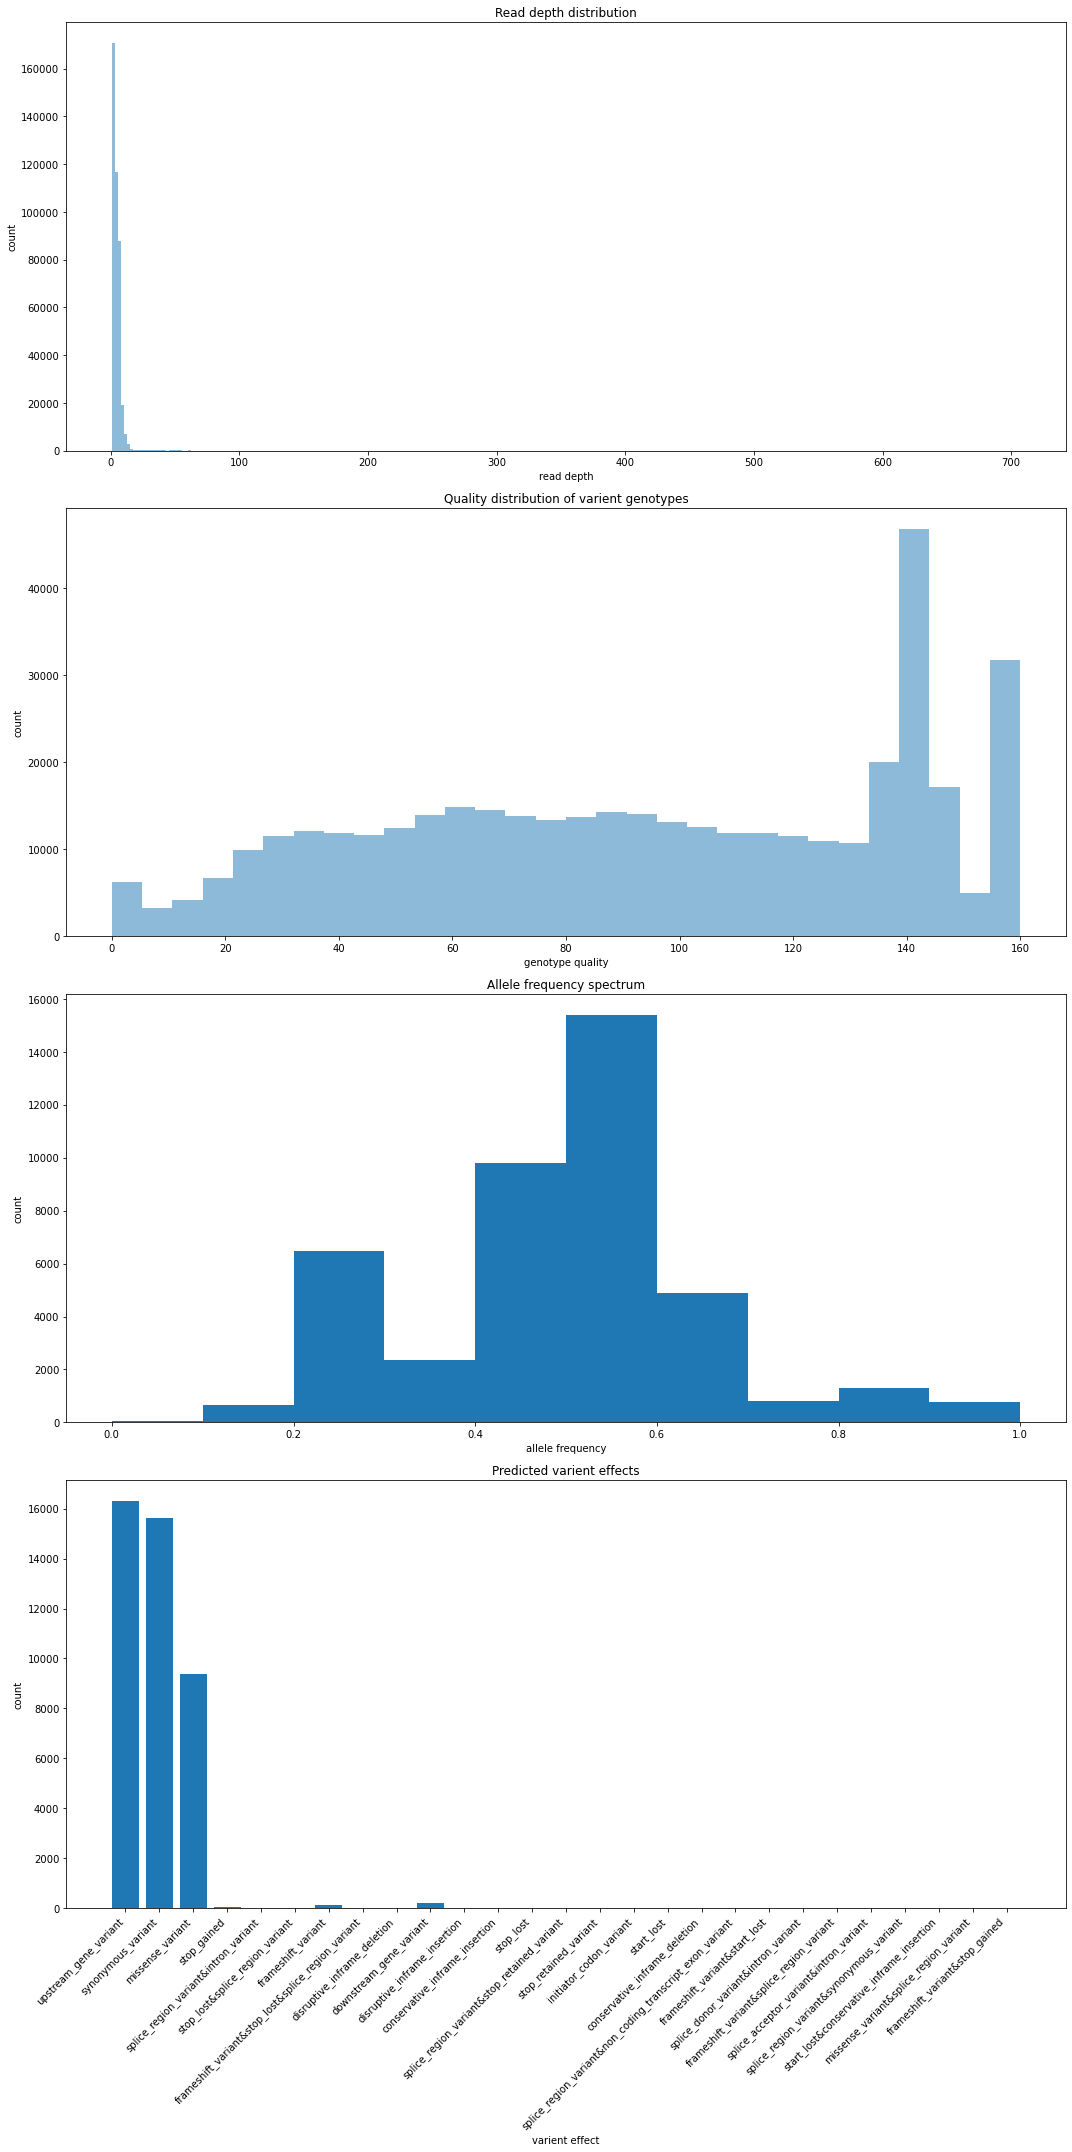

In [5]:
fig, ax = plt.subplots(4,figsize=(15,30))

ax[0].hist(read_d, bins = 300, alpha = 0.5)
ax[1].hist(genotype_q, bins = 30, alpha = 0.5)
ax[2].hist(allele_f)
ax[3].bar(var.keys(), var.values())

ax[0].set_title('Read depth distribution')
ax[0].set_xlabel('read depth')
ax[0].set_ylabel('count')

ax[1].set_title('Quality distribution of varient genotypes')
ax[1].set_xlabel('genotype quality')
ax[1].set_ylabel('count')

ax[2].set_title('Allele frequency spectrum')
ax[2].set_xlabel('allele frequency')
ax[2].set_ylabel('count')

ax[3].set_title('Predicted varient effects')
ax[3].set_xticklabels(var.keys(), rotation=45, ha='right', fontsize=10)
ax[3].set_xlabel('varient effect')
ax[3].set_ylabel('count')

fig.tight_layout()
plt.show()